# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [4]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [5]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [7]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845829024


### Graph t vs $\epsilon$

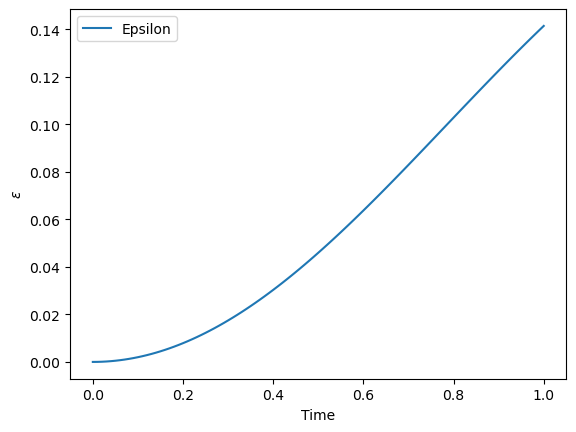

In [9]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [11]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m)) 
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [12]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))
print(UDD_calculate_s_values(6))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))
print(UDD_calculate_s_values(8))


error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))
print(UDD_calculate_s_values(10))


Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0004995820845829024
For m = 4 the error is 0.0002496353782160249
For m = 6 the error is 0.00016640438462257455
For m = 8 the error is 0.0001247982491792856
For m = 10 the error is 9.983673349871192e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.249909813324557e-05
For m = 6 the error is 1.8775597696427797e-07
For m = 11 the error is 2.606462738292785e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.2499098133243837e-05
For m = 4 the error is 2.9031863259118986e-07
For m = 6 the error is 8.175186760529897e-08
[0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]
For m = 8 the error is 4.455600939580585e-08
[0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0

In [13]:
# values found below

m_values_optimized = [2,3,4,6,8,10]
error_optimized = [0.000499571009354022, 9.637770643047125e-10, 1.3185843644749708e-09,6.570497960815582e-10,1.6026960554008968e-09,6.195767679163424e-10]

### Graph t vs $\epsilon$

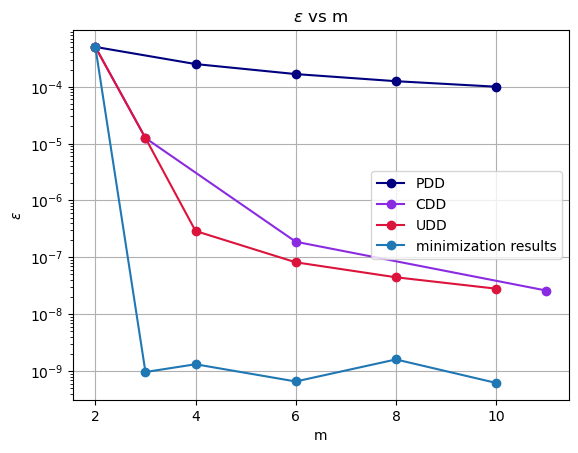

In [15]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized, marker='o', label = "minimization results")


plt.title('$\epsilon$ vs m')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T and m

### When m = 2

Fix T, $\lambda\$ and m = 2

In [19]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T)
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon    

In [20]:
# Starting guess
s_values_start = [np.random.random(), np.random.random()]

# Constraints -> s1 + s2 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
print("s1 = " + str(s1) + " s2 = " + str(s2))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06984D-02    |proj g|=  9.55362D-02

At iterate    1    f=  4.29593D-03    |proj g|=  2.19617D-02

At iterate    2    f=  4.26325D-03    |proj g|=  3.40445D-02
s1 = 0.49998534076010426 s2 = 0.4999816635668304

At iterate    3    f=  4.09826D-03    |proj g|=  1.81484D-02

At iterate    4    f=  3.83807D-03    |proj g|=  1.95109D-02

At iterate    5    f=  3.19040D-03    |proj g|=  5.38721D-02

At iterate    6    f=  2.21211D-03    |proj g|=  9.21748D-02

At iterate    7    f=  1.29186D-03    |proj g|=  6.42786D-02

At iterate    8    f=  7.57705D-04    |proj g|=  7.52660D-02

At iterate    9    f=  5.36964D-04    |proj g|=  1.93367D-02

At iterate   10    f=  5.00148D-04    |proj g|=  2.63412D-03

At iterate   11    f=  4.99676D-04    |proj g|=  1.72135D-03

At iterate   12    f=  4.99571D-04    |

/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


In [21]:
# lowest value found above - lowest so Far
epsilon_func([0.5, 0.5])

0.0004995820845829024

In [22]:
# minimized value
print(s1,s2)
print(s1+s2)
epsilon_func([s1,s2])


0.49998534076010426 0.4999816635668304
0.9999670043269346


0.0004995710112938348

In [23]:
print(epsilon_func([0.49998361065319974, 0.49998361065319974]))
print(epsilon_func([0.4999837890188431, 0.4999833220272216]))
print(epsilon_func([0.49998336258508624,0.49998337866864523]))
print(epsilon_func([0.4999833648036424,0.499983365617878]))


0.0004995710115871328
0.0004995710106577283
0.0004995710092230183
0.0004995710092228119


### When m = 3
Fix T, $\lambda\$ and m = 3

In [25]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T)
    B = A @ expm(-1j*(Z+lambda_value*X)*s3*T)
    difference = B - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [26]:
# Starting guess
s_values_start = [np.random.random(),np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53427D-02    |proj g|=  9.94482D-02

At iterate    1    f=  6.95805D-03    |proj g|=  7.56389D-02

At iterate    2    f=  5.21938D-03    |proj g|=  1.83870D-02

At iterate    3    f=  5.14768D-03    |proj g|=  1.02118D-02

At iterate    4    f=  4.90250D-03    |proj g|=  2.33643D-02

At iterate    5    f=  4.12246D-03    |proj g|=  5.75558D-02

At iterate    6    f=  3.00570D-03    |proj g|=  9.04608D-02

At iterate    7    f=  1.92911D-03    |proj g|=  6.85126D-02

At iterate    8    f=  3.05664D-04    |proj g|=  2.91684D-02

At iterate    9    f=  2.86249D-04    |proj g|=  7.17455D-03

At iterate   10    f=  2.84322D-04    |proj g|=  4.81936D-03

At iterate   11    f=  2.83697D-04    |proj g|=  1.56315D-03

At iterate   12    f=  2.83620D-04    |proj g|=  1.05721D-03

At iterate   13    f=  2.8

In [27]:
# lowest value found above
epsilon_func([1/4,1/2,1/4])

1.249909813324557e-05

In [28]:
# minimized value
print(s1+s2+s3)
print("s1= ", s1, "s2 = ", s2, "s3=", s3)
epsilon_func([s1,s2,s3])


1.0000041528381756
s1=  0.25031230233078466 s2 =  0.49937676177430546 s3= 0.2503150887330855


3.3601962113286104e-09

In [29]:
# lowest found
print(s1,s2,s3)
print(epsilon_func([0.2503131326075795, 0.4993768041187886, 0.25031423701763944]))
#s1 =  0.25031269456576893  s2 =  0.49937461113734705  s3 =  0.2503126942968841
#4.16299704372454e-07
print(epsilon_func([0.25031269456576893,0.49937461113734705,0.2503126942968841]))
print(epsilon_func([0.2503139951814718,0.49937672578019454,0.2503134407280822]))

s1 =  0.2503130334449466  
s2 =  0.49937393184986445  
s3 =  0.250313034705189
print(s1+s2+s3)
epsilon_func([s1,s2,s3])

0.25031230233078466 0.49937676177430546 0.2503150887330855
2.7011641425558947e-09
4.16299704372454e-07
9.637770643047125e-10
1.0


4.165208333609877e-07

### When m = 4
Fix T, $\lambda\$ and m = 4

In [31]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T)@ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T)@ expm(-1j*(Z-lambda_value*X)*s4*T)
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [32]:
# Starting guess
s_values_start = [0,0,0,0]
#s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B',options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         4 variables are exactly at the bounds

At iterate    0    f=  9.99583D-02    |proj g|=  9.98750D-02

At iterate    1    f=  6.00410D-02    |proj g|=  9.99549D-02
  ys=-3.178E-05  -gs= 3.990E-02 BFGS update SKIPPED

At iterate    2    f=  9.81835D-04    |proj g|=  9.68439D-02

At iterate    3    f=  2.50520D-04    |proj g|=  8.92029D-03

At iterate    4    f=  2.49623D-04    |proj g|=  5.65938D-04

At iterate    5    f=  2.49593D-04    |proj g|=  9.26668D-04

At iterate    6    f=  2.49360D-04    |proj g|=  3.12047D-03

At iterate    7    f=  2.48808D-04    |proj g|=  6.31232D-03

At iterate    8    f=  2.47306D-04    |proj g|=  1.17454D-02

At iterate    9    f=  2.43443D-04    |proj g|=  2.05683D-02

At iterate   10    f=  2.33409D-04    |proj g|=  3.56223D-02

At iterate   11    f=  2.09351D-04    |proj g|=  6.17678D-02

At iterate   12    f=  1.69230D-04  

In [33]:
# lowest s in prev part
epsilon_func([0.14644660940672624, 0.3535533905932736, 0.35355339059327384, 0.14644660940672627])

2.9031863259118986e-07

In [34]:
# minimized values
print(s1+s2+s3+s4)
print(s1, s2, s3, s4)
epsilon_func([s1,s2,s3,s4])


1.0000020302246881
0.1465200916941976 0.35348042498029714 0.3534809680760222 0.1465205454741712


1.4050766872447189e-09

In [35]:
print(epsilon_func([0.14002269377036433,0.3471307048304575,0.35994513617231017,0.1529014652268681] ))
print(epsilon_func([0.14852368879439615,0.35548431730913477,0.3514863478995621,0.144505645996907]))
print(epsilon_func([0.18260355134222295,0.3934429524912896,0.31758791595654123,0.10636778240906868]))
print(epsilon_func([0.11201090406009984,0.3221869714667899,0.3878254228854342,0.17797886271369787]))
print(epsilon_func([0.15660249719595007,0.36380421129713986,0.3434496115008143,0.13614572318190296]))
print(epsilon_func([0.16772630320693488,0.37592124270119004,0.3323840437689914,0.12397048978012597
]))
#lowest found

#s1 =  0.14002269377036433
#s2 =  0.3471307048304575  
#s3 =  0.35994513617231017  
#s4 =  0.1529014652268681
# 2.0282149550342433e-07

#s1 =  0.14852368879439615  
#s2 =  0.35548431730913477  
#s3 =  0.3514863478995621  
#s4 =  0.144505645996907
# 2.022947457958505e-07



s1 =  0.03765566095204766  
s2 =  0.27063906421385175  
s3 =  0.4618681202205331  
s4 =  0.22984044745027865
print(s1+s2+s3+s4)
epsilon_func([s1,s2,s3,s4])

2.028214955034198e-07
2.0229474578497696e-07
3.5239377130349133e-09
1.8201361302785667e-09
1.5676595736022162e-09
1.3185843644749708e-09
1.000003292836711


9.336118110792099e-08

### When m = 6
Fix T, $\lambda\$ and m = 6

In [37]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T) @ expm(-1j*(Z-lambda_value*X)*s4*T) @ expm(-1j*(Z+lambda_value*X)*s5*T) @ expm(-1j*(Z-lambda_value*X)*s6*T)
    
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [38]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64681D-01    |proj g|=  9.98000D-02

At iterate    1    f=  1.05043D-01    |proj g|=  1.00068D-01
  ys=-1.107E-04  -gs= 5.958E-02 BFGS update SKIPPED

At iterate    2    f=  6.10179D-02    |proj g|=  1.00248D-01
  ys=-2.627E-05  -gs= 4.401E-02 BFGS update SKIPPED

At iterate    3    f=  2.78794D-02    |proj g|=  1.00387D-01

At iterate    4    f=  1.27794D-03    |proj g|=  4.11473D-02

At iterate    5    f=  1.18697D-03    |proj g|=  1.55167D-02

At iterate    6    f=  5.11777D-04    |proj g|=  9.48417D-02

At iterate    7    f=  1.33450D-04    |proj g|=  6.94356D-02

At iterate    8    f=  9.07897D-05    |proj g|=  1.55410D-02

At iterate    9    f=  8.79870D-05    |proj g|=  4.40737D-02

At iterate   10    f=  8.67309D-05    |proj g|=  5.75204D-02

At iterate   11    f=  8.27719D-05    |proj g|


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


In [39]:
# lowest s in prev part
epsilon_func([0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059])

8.175186760529897e-08

In [40]:
# minimized values
print(s1+s2+s3+s4+s5+s6)
print(s1,s2,s3,s4,s5,s6)
epsilon_func([s1,s2,s3,s4,s5,s6])


1.0000036887686483
0.01995264484161677 0.2606656123341767 0.4545591089350599 2.8059566547143718e-11 0.024940619328068965 0.23988570330166628


8.682436699890883e-10

In [41]:
#lowest found
s1 =  0.10910226983427064  
s2 =  0.22407462624604563  
s3 =  0.16682131132939915  
s4 =  0.16682177187577263  
s5 =  0.2240768041956014  
s6 =  0.10910398095498218
print(s1+s2+s3+s4+s5+s6)
epsilon_func([s1,s2,s3,s4,s5,s6])

1.0000007644360716


6.570497960815582e-10

### When m = 8
Fix T, $\lambda\$ and m = 8

In [43]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    s7 = s_values[6]
    s8 = s_values[7]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T) @ expm(-1j*(Z-lambda_value*X)*s4*T) @ expm(-1j*(Z+lambda_value*X)*s5*T) @ expm(-1j*(Z-lambda_value*X)*s6*T)@ expm(-1j*(Z-lambda_value*X)*s7*T) @ expm(-1j*(Z+lambda_value*X)*s8*T)
    
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [44]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random() ]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] + s_values[6] + s_values[7]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
s7 = s_values[6]
s8 = s_values[7]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6, " s7 = ", s7, " s8 = ", s8)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01007D-01    |proj g|=  9.97196D-02

At iterate    1    f=  1.21751D-01    |proj g|=  1.00150D-01
  ys=-2.114E-04  -gs= 7.913E-02 BFGS update SKIPPED

At iterate    2    f=  6.11362D-02    |proj g|=  1.00440D-01



 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  3.95967D-03    |proj g|=  6.94007D-02

At iterate    4    f=  3.09222D-03    |proj g|=  1.19369D-02

At iterate    5    f=  3.05033D-03    |proj g|=  1.27125D-02

At iterate    6    f=  2.82667D-03    |proj g|=  5.56609D-02

At iterate    7    f=  2.60626D-03    |proj g|=  4.45825D-02

At iterate    8    f=  1.79979D-03    |proj g|=  8.13950D-02

At iterate    9    f=  7.10759D-04    |proj g|=  1.98017D-02

At iterate   10    f=  4.27513D-04    |proj g|=  9.99638D-02

At iterate   11    f=  1.53163D-04    |proj g|=  7.33068D-02

At iterate   12    f=  1.18768D-04    |proj g|=  8.94398D-02

At iterate   13    f=  8.25684D-05    |proj g|=  3.46678D-02

At iterate   14    f=  5.71107D-05    |proj g|=  3.65908D-02

At iterate   15    f=  5.18848D-05    |proj g|=  5.49977D-02

At iterate   16    f=  4.64310D-05    |proj g|=  2.65347D-02

At iterate   17    f=  4.42409D-05    |proj g|=  4.00414D-03

At iterate   18    f=  4.35950D-05    |proj g|=  4.77536D-03

At iter

In [45]:
# lowest s in prev part
epsilon_func([0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0.10838637566236964, 0.03806023374435663]
)

0.0014066079135575398

In [46]:
# minimized values
print(s1+s2+s3+s4+s5+s6+s7+s8)
print(s1,s2,s3,s4,s5,s6,s7,s8)
epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8])


1.0000027602109112
0.16756861524972588 0.05220507045032273 0.07463877874713161 0.23317511436527652 0.03698911601976052 0.21084885427364652 0.003238116310211331 0.22133909479483604


2.917167196286688e-09

In [47]:
#lowest found
print(epsilon_func([0.2352207313189638,0.24912740659407398,0.026743852621483974,0.23750863275233675,0.06523158186699833,1.5882458524719435e-06,0.012783438691303965,0.173386168165332]))
print(epsilon_func([0.038832142871271964,0.10566971911225455,0.04091821414586422,0.1523694169142003,0.3692303858938831,3.852577102062163e-09,0.2422070517329396,0.05077481628188628]))


1.6026960554008968e-09
1.303151245245274e-09


### When m = 10
Fix T, $\lambda\$ and m = 10

In [49]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    s7 = s_values[6]
    s8 = s_values[7]
    s9 = s_values[8]
    s10 = s_values[9]
    lambda_value = 0.1
    T = 0.1
    A = expm(-1j*(Z+lambda_value*X)*s1*T) @ expm(-1j*(Z-lambda_value*X)*s2*T) @ expm(-1j*(Z+lambda_value*X)*s3*T) @ expm(-1j*(Z-lambda_value*X)*s4*T) @expm(-1j*(Z+lambda_value*X)*s5*T) @ expm(-1j*(Z-lambda_value*X)*s6*T) @ expm(-1j*(Z+lambda_value*X)*s7*T) @ expm(-1j*(Z-lambda_value*X)*s8*T) @ expm(-1j*(Z+lambda_value*X)*s9*T) @ expm(-1j*(Z-lambda_value*X)*s10*T)
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [50]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(),np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 + s9 + s10 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] + 
                                     s_values[6] + s_values[7] + s_values[9] + s_values[9]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B',options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
s7 = s_values[6]
s8 = s_values[7]
s9 = s_values[8]
s10 = s_values[9]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6, " s7 = ", s7, " s8 = ", s8," s9 = ", s9, " s10 = ", s10)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07106D-01    |proj g|=  9.68537D-02

At iterate    1    f=  4.13001D-01    |proj g|=  9.79911D-02
  ys=-1.072E-03  -gs= 9.355E-02 BFGS update SKIPPED

At iterate    2    f=  3.27846D-01    |proj g|=  9.88364D-02
  ys=-6.860E-04  -gs= 8.480E-02 BFGS update SKIPPED

At iterate    3    f=  2.05287D-01    |proj g|=  9.97507D-02
  ys=-9.791E-04  -gs= 1.220E-01 BFGS update SKIPPED

At iterate    4    f=  1.35933D-01    |proj g|=  1.00107D-01
  ys=-1.912E-04  -gs= 6.925E-02 BFGS update SKIPPED

At iterate    5    f=  7.18703D-02    |proj g|=  1.00353D-01
  ys=-7.928E-05  -gs= 6.401E-02 BFGS update SKIPPED

At iterate    6    f=  7.72123D-03    |proj g|=  9.89260D-02

At iterate    7    f=  2.00010D-03    |proj g|=  2.69767D-02

At iterate    8    f=  1.94944D-03    |proj g|=  2.38534D-02

At iterate    


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate   26    f=  3.77759D-06    |proj g|=  5.55220D-03

At iterate   27    f=  2.02637D-06    |proj g|=  3.52816D-02

At iterate   28    f=  1.65611D-06    |proj g|=  2.70975D-02

At iterate   29    f=  8.84784D-07    |proj g|=  1.84621D-02

At iterate   30    f=  4.63421D-07    |proj g|=  3.49414D-02

At iterate   31    f=  2.41705D-07    |proj g|=  4.88280D-03

At iterate   32    f=  1.37579D-07    |proj g|=  3.25500D-02

At iterate   33    f=  1.05551D-07    |proj g|=  6.23000D-02

At iterate   34    f=  6.05537D-08    |proj g|=  3.17116D-02

At iterate   35    f=  3.03068D-08    |proj g|=  2.13738D-02

At iterate   36    f=  1.63822D-08    |proj g|=  5.13439D-02

At iterate   37    f=  9.90156D-09    |proj g|=  1.55200D-02

At iterate   38    f=  6.84333D-09    |proj g|=  5.03420D-02

At iterate   39    f=  4.09349D-09    |proj g|=  1.61450D-02
s1 = 
At iterate   40    f=  2.29660D-09    |proj g|=  5.14753D-02

           * * *

Tit   = total number of iterations
Tnf   = tot

In [51]:
# lowest s in prev part
epsilon_func([0.024471741852423214, 0.07101976096010307, 0.11061587104123718, 0.13938412895876282, 0.15450849718747361, 0.15450849718747384, 0.13938412895876295, 0.11061587104123694, 0.0710197609601032, 0.02447174185242318])

2.811032373227265e-08

In [52]:
# minimized values
print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
print(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10)
epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10])


1.000001492487505
0.11620797888537242 0.18410504305525574 0.025346653862649244 0.0027507119157036677 0.025346063662283043 0.1594775783233939 0.030475674209233833 0.000700266157703089 0.30255647064072255 0.15303505177518742


2.2966013073782882e-09

In [53]:
#lowest found

s1 =  0.05364872685533633  
s2 =  0.14721064956475943  
s3 =  0.10233004848784125  
s4 =  0.09337909913391204  
s5 =  0.13074073761091892  
s6 =  0.0986948049530884  
s7 =  0.11486611070913687  
s8 =  0.06256525581307926  
s9 =  0.09828268275595599  
s10 =  0.0982822834359638

print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
print(epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]))

print(epsilon_func([1.3832143212538895e-05,0.020171240809496914,0.1442138957198114,0.03857411216316778,0.08901720196922741,0.3702780729681437,0.23488945296172076,0.0706718608067379,0.03217222452389344, 3.2959598175463414e-10]))
print(epsilon_func([1.1248132237043405e-06,0.04512320843842305,0.024593384013038292,0.04527834728491069,0.2332676617591886,0.3199456675667349,0.16622576804101777,0.04481066813168081,0.07601596691112808,0.04473936994512728]))

#8.06804355409631e-10
#epsilon_func([0.2351430703273727,0.3154665641681026,-0.1666701178852503,0.0380625427310032,0.03931095646774125,0.07261701465054925,0.412494548256661,0.18287678730659268 ,-0.0199685790907167,-0.1093275489862226])

1.0000003993199922
2.6648916945411316e-09
1.5548200284543092e-09
6.195767679163424e-10
